In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def mean(X):
    '''Mean'''
    return sum(X)/len(X)


def D(X):
    '''Variance'''
    N = len(X)
    ax = mean(X)
    return sum((x-ax)**2 for x in X)/(N-1)




def cov(X, Y):
    '''Covariance of X and Y'''
    N = len(X)
    ax = mean(X) # среднее X
    ay = mean(Y) # среднее Y
    return sum((x-ax)*(y-ay) for x,y in zip(X,Y))/(N-1)


def sd(X):
    '''Standard deviation of X'''
    return D(X)**.5


def new_ax(xlabel = '', ylabel = '', title = '', equal=True):
    fig = plt.figure(figsize=(7, 9))
    ax = fig.add_subplot()
    if equal:
        ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax


def plot_interval(group, X, color='b', ax=None):
    m = mean(X)
    se = sd(X)/len(X)**.5
    y1 = m - 1.96*se
    y2 = m + 1.96*se
    ax = ax if ax else new_ax('Group','Value', equal=False)
    ax.plot([group,group],[y1,y2], color+'-')
    ax.plot([group, group],[m,m],color+'s')
    ax.plot([group, group],[y1,y1],color+'_',markersize=20)
    ax.plot([group, group],[y2,y2],color+'_',markersize=20)
    return ax

In [9]:
dframe = pd.read_csv('atherosclerosis.csv')

NameError: name 'sd' is not defined

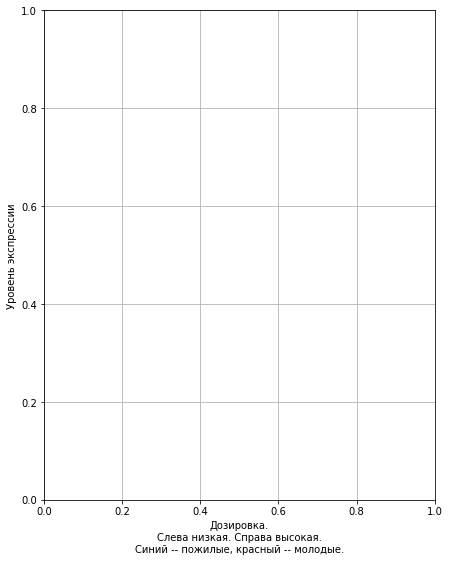

In [10]:
X_1d1 = dframe[(dframe['age'] == 1) & (dframe['dose'] == 'D1')]['expr']
X_2d1 = dframe[(dframe['age'] == 2) & (dframe['dose'] == 'D1')]['expr']
X_1d2 = dframe[(dframe['age'] == 1) & (dframe['dose'] == 'D2')]['expr']
X_2d2 = dframe[(dframe['age'] == 2) & (dframe['dose'] == 'D2')]['expr']

ax = new_ax('Дозировка.\nСлева низкая. Справа высокая.\nСиний -- пожилые, красный -- молодые.', 'Уровень экспрессии', equal=False)
plot_interval(0.9, X_1d1, 'r', ax)
plot_interval(1.1, X_2d1, 'b', ax)
plot_interval(1.9, X_1d2, 'r', ax)
plot_interval(2.1, X_2d2, 'b', ax)